# What Is Containerization?
Installation problems are very common when a project is deployed on a different. Meaning, when a project is developed on a environment and deployed on another environment, there could be some problem that could be encountered, like, conflicts in the versions of dependencies, unavailability of certain dependencies that the project requires, difference in hardware, etc.

Consider the following pipeline used in Data Science,
1. Data collection.
2. Data cleaning, EDA, and feature engineering.
3. Model building and evaluation.
4. Deploying the model. This involves the following steps,
    - Package the model and create an API.
    - Delpoying on some server.

Containerization comes into the picture in step 4. Containerization or a container service helps in packaging the software (ML model in this case) into a portable item.

Before container services came into existence, the developer apart from developing a software, also used to compose a file containing the BKM (Best Known Method) to get the software up and running. This BKM contained all the information about the requirements (Hardware + OS + Software) and the installation steps. Repeating this process over and over again is obviously tedious. Also, even if a single step is missed or in-correctly executed, solving the reprecussions would take a lot of time.

Container services solved exactly this problem, where all the dependencies are packaged into a single sub system (a container) and this is shipped for deployment. The different dependencies that a container has are,
- An OS of its own with a file system and network with its own ports.
- Project dependencies.

A container is essential a computer machine like any other with restrictions on certain things like RAM, Storage, Processor etc. Containers are lightweight, portable units that package an application and its dependencies together, ensuring that it runs consistently across different environments. In a nutshell, a container is a machine that is built for a single project.

# Comparison Of Containers And Virtual Machines
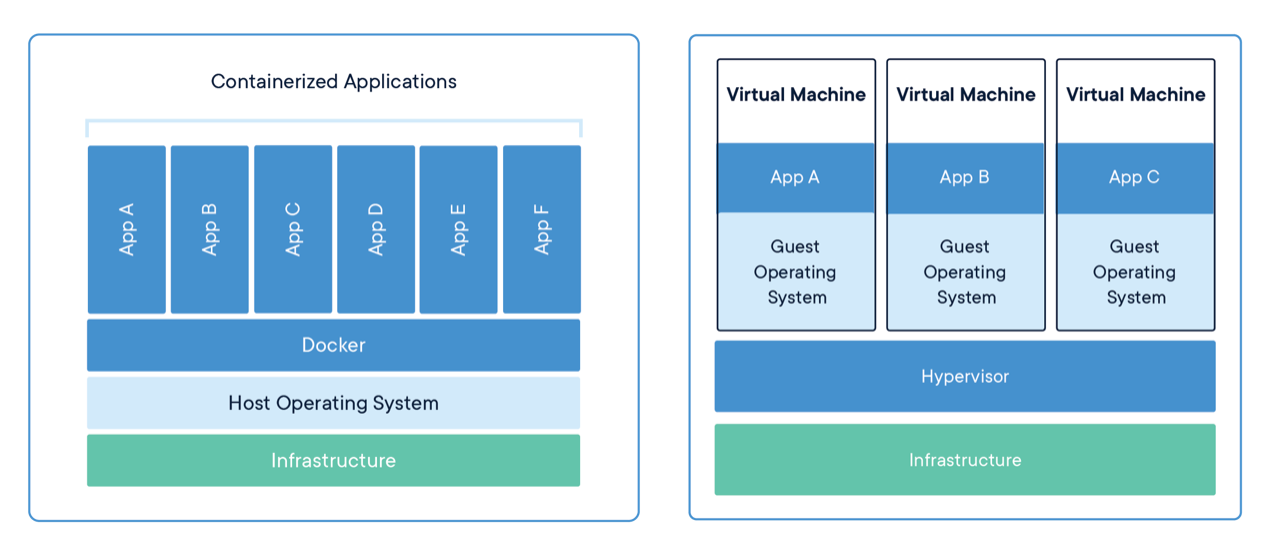

